In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
from sklearn.model_selection import train_test_split

# change the problem into binary classification
df_iris_binary = df_iris.copy()
df_iris_binary['species'] = df_iris_binary['species'].apply(lambda x: 1 if x == 'setosa' else 0)
df_iris_binary.rename(columns={'species': 'is_setosa'}, inplace=True)

# split train and test set
X = df_iris_binary.drop('is_setosa', axis=1)
y = df_iris_binary['is_setosa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [7]:
y_train.value_counts()

0    76
1    44
Name: is_setosa, dtype: int64

In [8]:
df_iris_binary_train = pd.concat([X_train, y_train], axis=1)
df_iris_binary_test = pd.concat([X_test, y_test], axis=1)

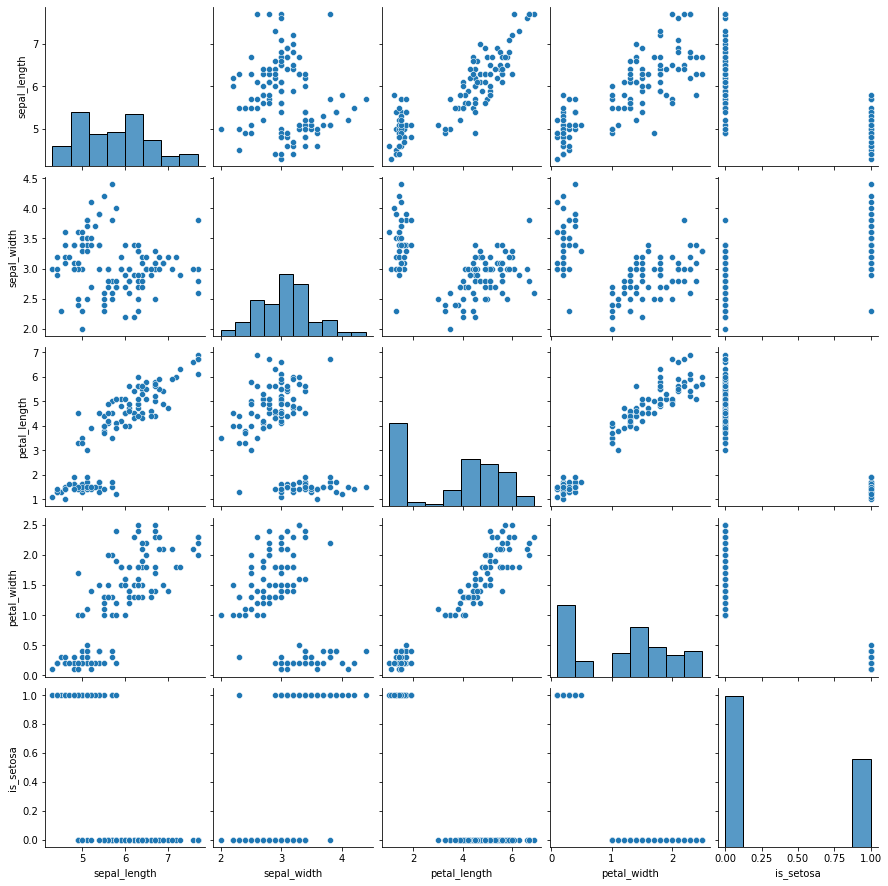

In [9]:
sns.pairplot(df_iris_binary_train)

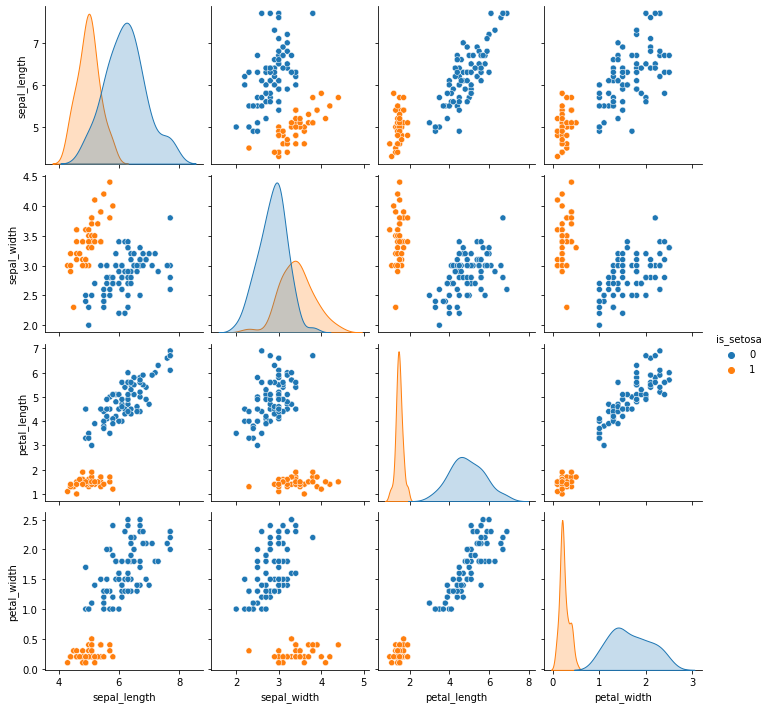

In [10]:
sns.pairplot(df_iris_binary_train, hue='is_setosa')

In [11]:
used_cols = ['sepal_length', 'sepal_width', 'petal_width']

X_train_used = X_train[used_cols]
X_test_used = X_test[used_cols]

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_used, y_train)

LogisticRegression()

In [13]:
log_reg.score(X_train_used, y_train)

1.0

In [14]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_test = log_reg.predict(X_test_used)
confusion_matrix(y_test, y_pred_test)

array([[24,  0],
       [ 0,  6]], dtype=int64)

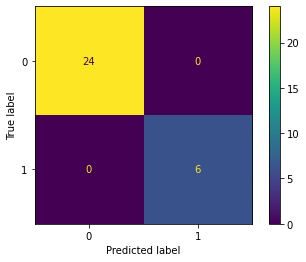

In [15]:
plot_confusion_matrix(log_reg, X_test_used, y_test)

In [16]:
f1_score(y_test, y_pred_test)

1.0

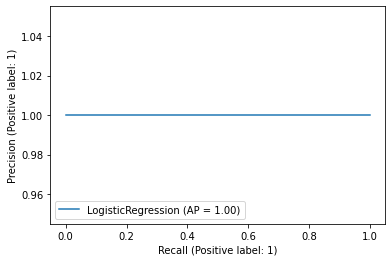

In [17]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, roc_auc_score, roc_curve, plot_roc_curve

plot_precision_recall_curve(log_reg, X_test_used, y_test)

In [18]:
pred_proba_test = log_reg.predict_proba(X_test_used)[:, 1]
precision_recall_curve(y_test, pred_proba_test)

(array([1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 0.83333333, 0.66666667, 0.5       , 0.33333333,
        0.16666667, 0.        ]),
 array([0.87317362, 0.90496278, 0.92430722, 0.94218506, 0.95208202,
        0.96968371]))

In [19]:
# predict proba
pred_proba_test = log_reg.predict_proba(X_test_used)[:, 1]
threshold = 0.87

y_pred = []
for proba in pred_proba_test:
    if proba >= 0.87:
        y_pred.append(1)
    else:
        y_pred.append(0)

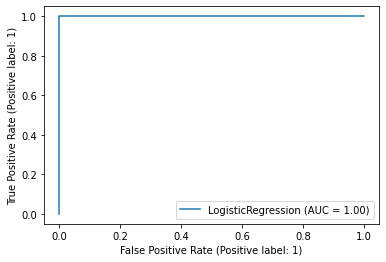

In [20]:
plot_roc_curve(log_reg, X_test_used, y_test)

In [21]:
roc_curve(y_test, pred_proba_test)

(array([0., 0., 0., 1.]),
 array([0.        , 0.16666667, 1.        , 1.        ]),
 array([1.96968371e+00, 9.69683708e-01, 8.73173619e-01, 9.40058351e-04]))

In [22]:
roc_auc_score(y_test, pred_proba_test)

1.0